In [1]:
import glob
import sys
from desispec.io import read_spectra
from astropy.table import Table
import numpy
import matplotlib.pyplot as plt
from desiutil.log import get_logger, DEBUG
from desidiff.src.group_tiles import *
from desidiff.src.dates_to_process import *
from desidiff.src.coadd import *
from desidiff.src.scores import *
from desidiff.src.ContinuumFitFilter_desidiff import *

Before we were tracking tile/date combinations that were processed. Now we track spectra*.fits that have been processed. So the initial condition is the name of the filename to work on

In [2]:
filename = "/global/project/projectdirs/desi/spectro/redux/everest/tiles/cumulative/80979/20210706/spectra-3-80979-thru20210706.fits"

Read in the two files that contain the spectra and redshifts

In [3]:
spectra = read_spectra(filename)
rr = Table.read(filename.replace('spectra','redrock'), format='fits',hdu=1, memmap=True)['TARGETID','Z','ZERR','ZWARN','SPECTYPE']

INFO:spectra.py:285:read_spectra: iotime 5.635 sec to read spectra-3-80979-thru20210706.fits at 2022-02-04T11:26:29.029304


If there is only one night then exit

In [4]:
if len(numpy.unique(spectra.fibermap['NIGHT'])) == 1:
    sys.exit(0)

Determine the unique targetid's

In [5]:
unique_targetid = numpy.unique(spectra.fibermap['TARGETID'][numpy.logical_and(spectra.fibermap['OBJTYPE']=='TGT', spectra.fibermap['FIBERSTATUS']==0)])

Loop over the unique targetids

In [6]:
#Set non-default plot size 
plt.rcParams["figure.figsize"] = (20,6)

#SkyPortal token:
secret_file = "/global/cfs/cdirs/desi/science/td/secrets/desidiff_sp.txt"
with open(secret_file, 'r') as file:
    token = file.read().replace('\n', '')
headers = {'Authorization': f'token {token}'}

filter_name = 'DESIDIFF'

39633294328861253 20210601


<ipython-input-7-16917bce8e18>:55: RuntimeWarning: divide by zero encountered in true_divide
  difivar = {key: 1./(1./newivar[key] + 1./refivar[key])
/global/u2/d/divij18/timedomain/desidiff/src/scores.py:75: RuntimeWarning: divide by zero encountered in true_divide
  newston[b]=numpy.convolve(newy[b], conk, mode='valid') / numpy.sqrt(numpy.convolve(1/ivar[b], conk, mode='valid'))
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


39633294328861253 20210603
39633294328861253 20210605


<ipython-input-7-16917bce8e18>:55: RuntimeWarning: divide by zero encountered in true_divide
  difivar = {key: 1./(1./newivar[key] + 1./refivar[key])
/global/u2/d/divij18/timedomain/desidiff/src/scores.py:75: RuntimeWarning: divide by zero encountered in true_divide
  newston[b]=numpy.convolve(newy[b], conk, mode='valid') / numpy.sqrt(numpy.convolve(1/ivar[b], conk, mode='valid'))
/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:87: RuntimeWarning: divide by zero encountered in true_divide
  HBsigma = 1/np.sqrt(HBivar)
/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:104: RuntimeWarning: divide by zero encountered in true_divide
  NIIIsigma = 1/np.sqrt(NIIIivar)
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


39633294328861253 20210609
39633294333051065 20210601
39633294333051065 20210603
39633294333051065 20210605


/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:96: RuntimeWarning: divide by zero encountered in true_divide
  Hasigma = 1/np.sqrt(Haivar)


39633294333051065 20210609
39633294333051700 20210601
39633294333051700 20210603
39633294333051700 20210605
39633294333051700 20210609
39633294333052255 20210601
39633294333052255 20210603
39633294333052255 20210605
39633294333052255 20210609
39633294333053183 20210601
39633294333053183 20210603
39633294333053183 20210605
39633294333053183 20210609
39633294333053389 20210601
39633294333053389 20210603
39633294333053389 20210605
39633294333053389 20210609
39633294333054207 20210601
39633294333054207 20210603
39633294333054207 20210605
39633294333054207 20210609
39633294333054345 20210601
39633294333054345 20210603
39633294333054345 20210605
39633294333054345 20210609
39633294333055178 20210601
39633294333055178 20210603
39633294333055178 20210605
39633294333055178 20210609
39633294337245575 20210601
39633294337245575 20210603
39633294337245575 20210605
39633294337245575 20210609
39633294337246208 20210601
39633294337246208 20210603
39633294337246208 20210605
39633294337246208 20210609
3

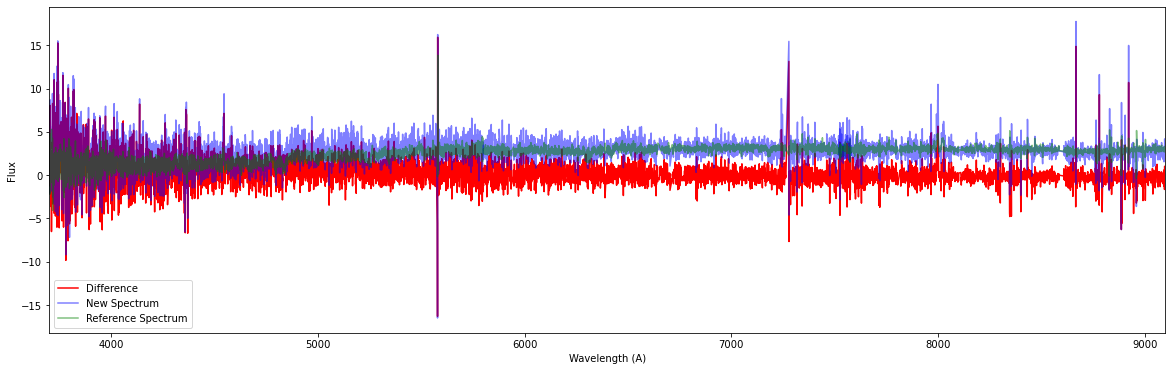

39633294337248115 20210609
39633294337248125 20210601


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


39633294337248125 20210603
39633294337248125 20210605


<ipython-input-7-16917bce8e18>:55: RuntimeWarning: divide by zero encountered in true_divide
  difivar = {key: 1./(1./newivar[key] + 1./refivar[key])
/global/u2/d/divij18/timedomain/desidiff/src/scores.py:75: RuntimeWarning: divide by zero encountered in true_divide
  newston[b]=numpy.convolve(newy[b], conk, mode='valid') / numpy.sqrt(numpy.convolve(1/ivar[b], conk, mode='valid'))


39633294337248125 20210609
39633294337248693 20210601
39633294337248693 20210603
39633294337248693 20210605


/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:96: RuntimeWarning: divide by zero encountered in true_divide
  Hasigma = 1/np.sqrt(Haivar)


39633294337248693 20210609
39633294337249476 20210601
39633294337249476 20210603
39633294337249476 20210605
39633294337249476
[-- 'line' -- --]


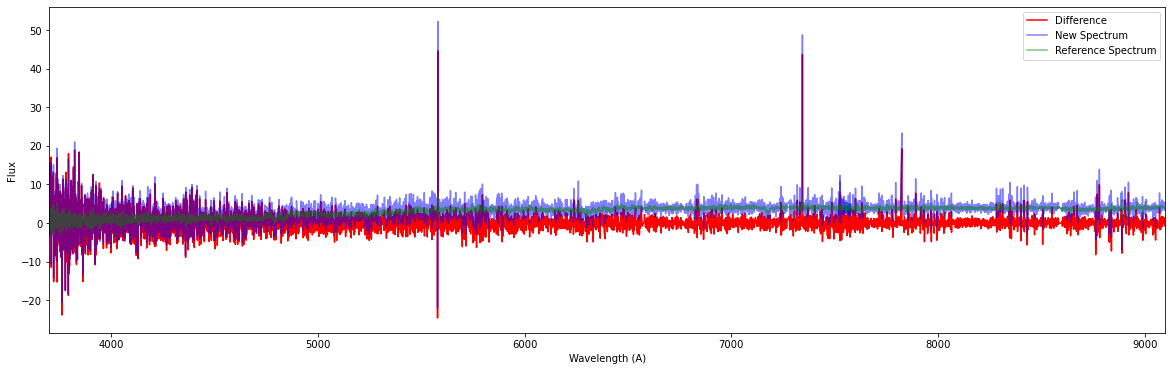

39633294337249476 20210609


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


39633294337250110 20210601
39633294337250110 20210603
39633294337250110 20210605


<ipython-input-7-16917bce8e18>:55: RuntimeWarning: divide by zero encountered in true_divide
  difivar = {key: 1./(1./newivar[key] + 1./refivar[key])
/global/u2/d/divij18/timedomain/desidiff/src/scores.py:75: RuntimeWarning: divide by zero encountered in true_divide
  newston[b]=numpy.convolve(newy[b], conk, mode='valid') / numpy.sqrt(numpy.convolve(1/ivar[b], conk, mode='valid'))
/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:96: RuntimeWarning: divide by zero encountered in true_divide
  Hasigma = 1/np.sqrt(Haivar)


39633294337250110 20210609
39633294341440332 20210601
39633294341440332 20210603
39633294341440332 20210605


/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:104: RuntimeWarning: divide by zero encountered in true_divide
  NIIIsigma = 1/np.sqrt(NIIIivar)


39633294341440332 20210609
39633294341440452 20210601
39633294341440452 20210603
39633294341440452 20210605
39633294341440452 20210609
39633294341443390 20210601
39633294341443390 20210603
39633294341443390 20210605


/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:87: RuntimeWarning: divide by zero encountered in true_divide
  HBsigma = 1/np.sqrt(HBivar)


39633294341443390
[-- 'line' -- --]


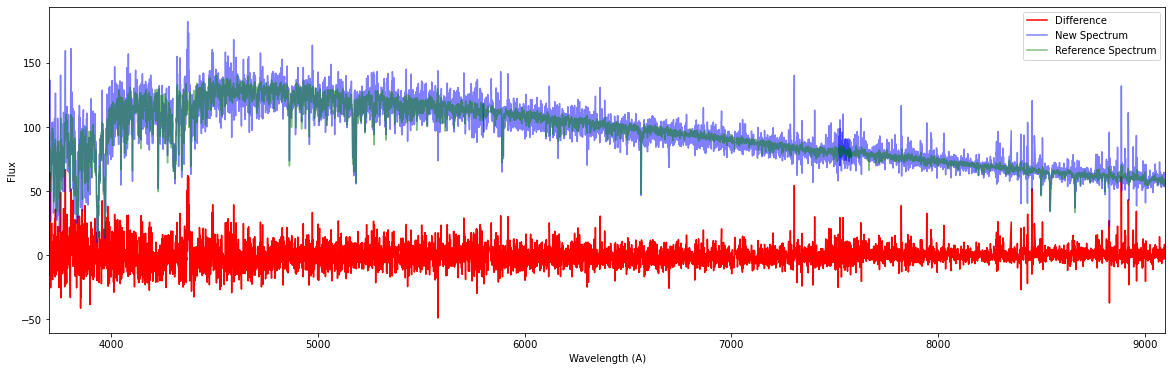

39633294341443390 20210609


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


39633294341443390
[-- 'line' -- --]


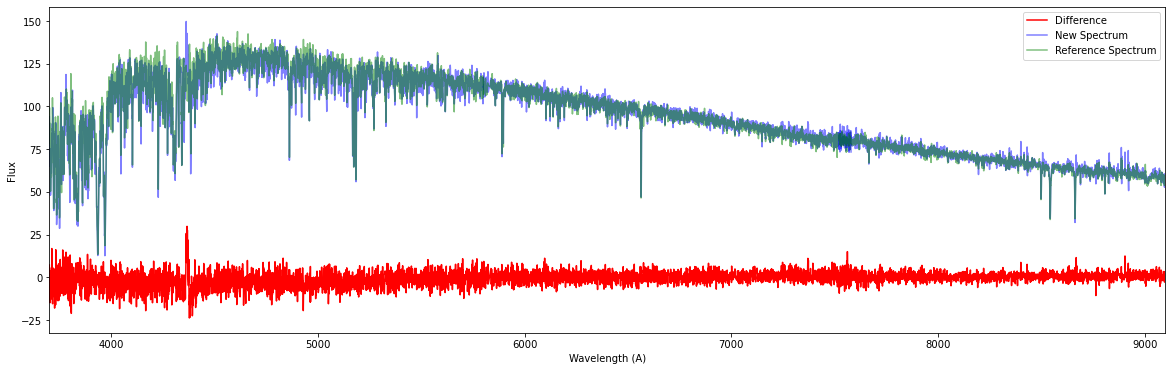

39633294345634092 20210601
39633294345634092 20210603


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-7-16917bce8e18>:55: RuntimeWarning: divide by zero encountered in true_divide
  difivar = {key: 1./(1./newivar[key] + 1./refivar[key])
/global/u2/d/divij18/timedomain/desidiff/src/scores.py:75: RuntimeWarning: divide by zero encountered in true_divide
  newston[b]=numpy.convolve(newy[b], conk, mode='valid') / numpy.sqrt(numpy.convolve(1/ivar[b], conk, mode='valid'))


39633294345634092 20210605


/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:96: RuntimeWarning: divide by zero encountered in true_divide
  Hasigma = 1/np.sqrt(Haivar)


39633294345634092 20210609
39633294345634855 20210601
39633294345634855 20210603
39633294345634855 20210605


/global/u2/d/divij18/timedomain/desidiff/src/ContinuumFitFilter_desidiff.py:104: RuntimeWarning: divide by zero encountered in true_divide
  NIIIsigma = 1/np.sqrt(NIIIivar)


39633294345634855 20210609
39633294345634972 20210601
39633294345634972 20210603
39633294345634972 20210605
39633294345634972 20210609
39633294345635534 20210601
39633294345635534 20210603
39633294345635534 20210605
39633294345635534 20210609
39633294345636931 20210601
39633294345636931 20210603


In [ ]:
lminb=3700.
lminr=5800.
lmaxr=7580.
lmaxz=9100.

for t in unique_targetid:
    # a spectra object with the subset of the targetid
    target_spectra = spectra.select(targets=[t])

    # the number of unique nights for this target id
    unique_nights = numpy.unique(target_spectra.fibermap['NIGHT'])

    # if there is only one night there is no subtraction possible
    if len(unique_nights) <=1:
        print("nothing to do here")
        break

    # the redshift information for this object
    zinfo = rr[rr['TARGETID']==t]
    # Do a search for each unique night.  Note that the filters are parity violating.
    for night in unique_nights:
        print(t, night)
        count = 0
        
        newSpectra=[]
        refSpectra=[]
        idx = numpy.in1d(unique_nights, night)
        ref_nights = unique_nights[~idx]
        # night = str(night)
        # ref_nights = [n for n in ref_nights if (int(str(n)[6:]) < int(night[6:]) and int(str(n)[4:6]) <= int(night[4:6]) and int(str(n)[:4]) <= int(night[:4]))]
        # night = int(night)
        ## build reference
        refSpectra.append(spectra.select(nights=ref_nights, targets = t))  
        
        ## build new
        newSpectra.append(spectra.select(nights=night, targets = t))
        
        ## search
        newflux, newivar, newwave, newmask = coadd(newSpectra)
        refflux, refivar, refwave, refmask = coadd(refSpectra)
        
        # renormalize spectra to match each other
        # There is a significant background of spectra that have the same shape but different fluxes
        # This seems to be related to mistaken coordinates of bright sources
        norm = normalization(newflux,newmask, refflux,refmask)

        for key in newflux.keys():
            newflux[key]=newflux[key]/norm
            newivar[key]=newivar[key]*norm**2        
        
        #difflux, difivar, difmask, difwave = dict.fromkeys(["b", "r", "z"]), dict.fromkeys(["b", "r", "z"]), dict.fromkeys(["b", "r", "z"]), dict.fromkeys(["b", "r", "z"])
        
        difflux = {key: newflux[key] - refflux[key]
                       for key in newflux.keys()}
        difivar = {key: 1./(1./newivar[key] + 1./refivar[key])
                       for key in newivar.keys()}
        difmask = {key: newmask[key] + refmask[key]
                       for key in newmask.keys()}
        difwave = dict(newwave)
                
        # Mask systematically problematic areas of the spectrum
        # trim red edge 
        if 'z' in difflux.keys():
            difmask['z'][difwave['z'] > lmaxz]=1

        # trim blue edge 
        if 'b' in difflux.keys():
            difmask['b'][difwave['b'] < lminb]=1
            
        if 'r' in difflux.keys():
            difmask['r'][difwave['r'] < lminr]=1
            difmask['r'][difwave['r'] > lmaxr]=1

        # mean-subtracted difference
        difflux_clipmean = clipmean(difflux,difivar,difmask)

        ## filters 
        
        # Difference spectrum may have broadband signal
        perband_filter = perband_SN(difflux_clipmean,difivar,difmask)
        
        # fractional increase
        perband_inc = perband_increase(difflux_clipmean,difivar,difmask, refflux,refivar,refmask)
        
        # Difference spectrum may have high-frequency signal
        perres_filter = perconv_SN(difwave, difflux_clipmean,difivar,difmask, ncon = 7)
        
        # Search for signature lines of TDEs, only interested in Galaxies
        linetable = line_finder(difwave, difflux_clipmean,difivar,difmask,zinfo['Z'][0])
        spectype = zinfo['SPECTYPE'][0]
        if spectype == "GALAXY":
            TDE_score = (linetable, difflux_clipmean)
        else:
            TDE_score = 0
        # Hlines
        Hline_score = Hline_filter(linetable)

        #broadband
        bblogic = any(numpy.logical_and(numpy.array(list(perband_filter.values()))>10, numpy.array(list(perband_inc.values()))>0.25))
        linelogic = perres_filter >=2
        TDElogic = any([TDE_score == 2, TDE_score == 3, TDE_score == 4, TDE_score == 5])
        Hlinelogic = any([Hline_score >= 1])
        derivlogic = any([deriv_score >= 3])
        
        logic = [bblogic,linelogic, TDElogic, Hlinelogic, derivlogic]
        logic_name = ['Broadband', 'line', 'TDE','Hline','Derivative'] #must be in same order as logic!, use as mask
        logic_name = numpy.ma.masked_array(logic_name, mask = [not i for i in logic])
        plt.clf()
        if any(logic):
            #Uncomment next line if you want to print only those TargetIds that get plotted
            print(t)
            print(logic_name)
            for b in difflux.keys():
                w=numpy.where(difmask[b] ==0)[0]
                if b == list(difflux.keys())[-1]:
                    plt.plot(difwave[b][w],difflux[b][w],color='red', label = 'Difference')
                    plt.plot(newwave[b][w],newflux[b][w],color='blue',alpha=0.5, label = 'New Spectrum')
                    plt.plot(refwave[b][w],refflux[b][w],color='green',alpha=0.5, label = 'Reference Spectrum')
                else:
                    plt.plot(difwave[b][w],difflux[b][w],color='red')
                    plt.plot(newwave[b][w],newflux[b][w],color='blue',alpha=0.5)
                    plt.plot(refwave[b][w],refflux[b][w],color='green',alpha=0.5)
            plt.legend()
            plt.xlim((lminb,lmaxz))
            plt.xlabel('Wavelength (A)')
            plt.ylabel('Flux') 
            plt.show()
            count=count+1
        if count == 20:
            wefew
        ## save to skyportal